In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
from collections import Counter

In [9]:
X,y=make_classification(n_samples=10000,n_features=10,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [10]:
X

array([[ 0.47570485,  0.00714415,  0.08784303, ...,  1.77073454,
         0.11172549,  1.27771359],
       [-0.99071748,  0.22845719, -0.07024482, ...,  1.10377154,
         2.09688569,  1.56827225],
       [ 2.57590983,  0.71039648,  1.27817309, ...,  1.23757319,
        -0.89722387,  1.47601931],
       ...,
       [ 0.15455559,  0.40412707,  0.17691651, ..., -0.71258966,
        -1.36210738,  0.28725833],
       [-1.41717063,  0.2243018 , -1.13765128, ..., -0.37635325,
        -0.33217582,  1.33550785],
       [ 0.31734574, -0.35316454,  0.8606477 , ..., -0.13229745,
        -1.09381092,  1.71410867]], shape=(10000, 10))

In [13]:
Counter(y)

Counter({np.int64(0): 9844, np.int64(1): 156})

<Axes: xlabel='0', ylabel='1'>

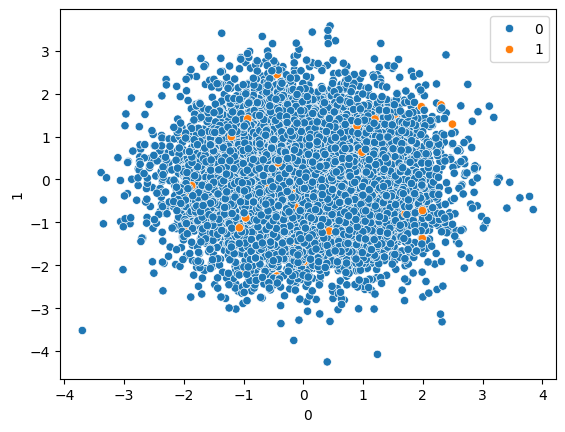

In [16]:
sns.scatterplot(x=pd.DataFrame(X)[0],
                y=pd.DataFrame(X)[1],
                hue=y)


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [19]:
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [18]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_value=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']

In [20]:
params=dict(penalty=penalty,C=c_value,solver=solver,class_weight=class_weight)

In [21]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [22]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=regression,param_grid=params,scoring="accuracy",cv=cv,n_jobs=-1)

In [23]:
grid.fit(X_train,y_train)

c:\Users\admin\Desktop\DS\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\admin\Desktop\DS\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\admin\Desktop\DS\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\admin\Desktop\DS\venv\Lib\site-packages\sklearn\linear_model\_logistic.py", lin

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [24]:
grid.best_score_

np.float64(0.9892537313432836)

In [25]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [27]:
y_pred=grid.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
score=accuracy_score(y_pred,y_test)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9875757575757576
[[3242    1]
 [  40   17]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3243
           1       0.94      0.30      0.45        57

    accuracy                           0.99      3300
   macro avg       0.97      0.65      0.72      3300
weighted avg       0.99      0.99      0.98      3300



In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [32]:
X,y=make_classification(n_samples=1000,n_classes=2,random_state=1)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [35]:
dummy_model_prob=[0 for _ in range(len(y_test))]


In [36]:
regression.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
model_prob=regression.predict_proba(X_test)

In [40]:
model_prob=model_prob[:,1]

In [41]:
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [44]:
dummy_fpr,dummy_tpr,_=roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,thresholds=roc_curve(y_test,model_prob)